## Step 1: Find and download a dataset

In [3]:
# "MRI and Alzheimer's" longitudinal dataset from Kaggle

# https://www.kaggle.com/jboysen/mri-and-alzheimers
# Further information can be found at the OASIS website: https://www.oasis-brains.org/#access
# Original paper Marcus et al with key/legend to columns: https://direct.mit.edu/jocn/article/22/12/2677/4983/Open-Access-Series-of-Imaging-Studies-Longitudinal

import pandas as pd
data = pd.read_csv("oasis_longitudinal.csv")

## Step 2: Divide into a training set and a testing set

In [4]:
from sklearn.model_selection import train_test_split

# First, drop NaN value rows on the non-split data to keep it balanced for the split
# Drop rows with null/missing values in SES and MMSE columns (identified by using data.info())
data.info()
data = data.dropna(axis=0)
data.info()
# Define the predictor and feature set
X = data.drop('Group', axis=1)
y = data['Group']

# Finally, divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Coun

 ## Step 3: Explore your training set

In [5]:
X_train.info()

print(y_train.describe())

X_train.describe()

# Note 3 categorical variables in predictor (non-demented, demented, converted)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 77 to 132
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  283 non-null    object 
 1   MRI ID      283 non-null    object 
 2   Visit       283 non-null    int64  
 3   MR Delay    283 non-null    int64  
 4   M/F         283 non-null    object 
 5   Hand        283 non-null    object 
 6   Age         283 non-null    int64  
 7   EDUC        283 non-null    int64  
 8   SES         283 non-null    float64
 9   MMSE        283 non-null    float64
 10  CDR         283 non-null    float64
 11  eTIV        283 non-null    int64  
 12  nWBV        283 non-null    float64
 13  ASF         283 non-null    float64
dtypes: float64(5), int64(5), object(4)
memory usage: 33.2+ KB
count             283
unique              3
top       Nondemented
freq              152
Name: Group, dtype: object


,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,1.844523,568.077739,77.007067,14.674912,2.487633,27.378092,0.268551,1482.844523,0.729640,1.199749
std,0.901455,619.744847,7.721662,2.959593,1.146544,3.817905,0.374687,176.712143,0.037849,0.138149
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,26.500000,0.000000,1348.500000,0.698000,1.105000
50%,2.000000,518.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1461.000000,0.731000,1.202000
75%,2.000000,844.000000,82.000000,17.000000,3.000000,30.000000,0.500000,1588.500000,0.755500,1.301500
max,5.000000,2517.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


## Step 4: Data cleaning

In [6]:
# Notes: null values in SES and MMSE columns were dropped already.
# Get rid of unecessary features: handedness (since all are right handed), MR delay time, Subject ID, MRI ID, Visit number
X_train_cleaned = X_train.drop(['Hand', 'MR Delay', 'Subject ID', 'MRI ID', 'Visit'], axis=1)
X_test_cleaned = X_test.drop(['Hand', 'MR Delay', 'Subject ID', 'MRI ID', 'Visit'], axis=1)

# Convert "M/F" categorical attribute to int. F is class '0' and M is class '1'.
X_train_cleaned['M/F'].replace(['M', 'F'], [0, 1], inplace=True)
X_test_cleaned['M/F'].replace(['M', 'F'], [0, 1], inplace=True)

# Since we are interested in predicting dementia based on biological attributes, not conversion to it, 
# transform "Converted" predictor category to "Demented."
y_train_cleaned = y_train.str.replace('Converted', 'Demented')
y_test_cleaned = y_test.str.replace('Converted', 'Demented')

# Encode the categorical predictor "Demented" to class '0' vs "Nondemented" to class '1'.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_cleaned = le.fit_transform(y_train_cleaned)
y_test_cleaned = le.fit_transform(y_test_cleaned)

## Step 5: Visualize the data in your training set

array([[<AxesSubplot:xlabel='M/F', ylabel='M/F'>,
        <AxesSubplot:xlabel='Age', ylabel='M/F'>,
        <AxesSubplot:xlabel='EDUC', ylabel='M/F'>,
        <AxesSubplot:xlabel='SES', ylabel='M/F'>,
        <AxesSubplot:xlabel='MMSE', ylabel='M/F'>,
        <AxesSubplot:xlabel='CDR', ylabel='M/F'>,
        <AxesSubplot:xlabel='eTIV', ylabel='M/F'>,
        <AxesSubplot:xlabel='nWBV', ylabel='M/F'>,
        <AxesSubplot:xlabel='ASF', ylabel='M/F'>],
       [<AxesSubplot:xlabel='M/F', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='EDUC', ylabel='Age'>,
        <AxesSubplot:xlabel='SES', ylabel='Age'>,
        <AxesSubplot:xlabel='MMSE', ylabel='Age'>,
        <AxesSubplot:xlabel='CDR', ylabel='Age'>,
        <AxesSubplot:xlabel='eTIV', ylabel='Age'>,
        <AxesSubplot:xlabel='nWBV', ylabel='Age'>,
        <AxesSubplot:xlabel='ASF', ylabel='Age'>],
       [<AxesSubplot:xlabel='M/F', ylabel='EDUC'>,
        <AxesSubplot:xlabel='Age', ylab

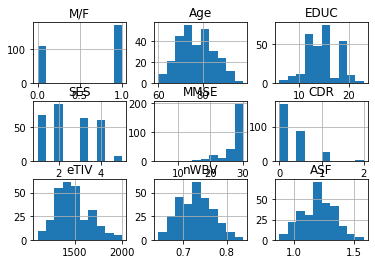

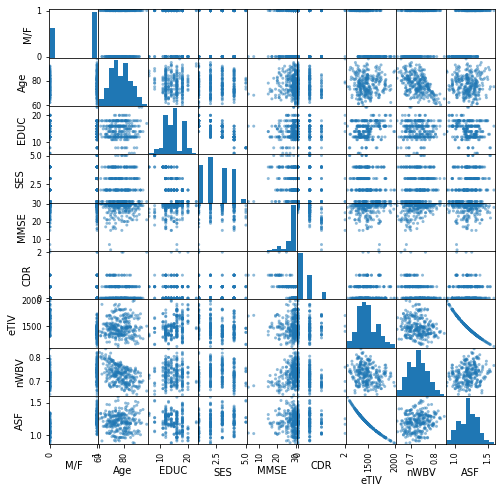

In [7]:
# Basic frequency histograms for each feature. We see MMSE is skewed toward high scores. CDR toward lower.
X_train_cleaned.hist()

# Scatter matrix of features. eTIV and ASF are closely correlated (ASF is derived from eTIV). Some correlation between age and nWBV,
# which intuitively makes sense.
pd.plotting.scatter_matrix(X_train_cleaned, figsize=(8,8))

<AxesSubplot:>

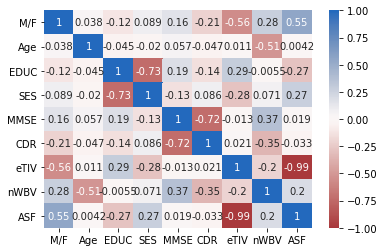

In [8]:
# Pearson correlations with heatmap. Note ASF + gender. SES + Educ. CDR + MMSE. ASF + eTIV.
import seaborn
seaborn.heatmap(X_train_cleaned.corr(), vmin=-1, vmax=1, cmap="vlag_r", annot=True)

## Step 6: Apply transformations to your data

NameError: name 'plt' is not defined

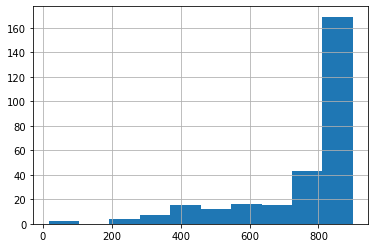

In [9]:
# Apply squaring, cubing, logarithmic, and exponentials to 2 features: MMSE, and ASF. Print the resultant histograms and
# scatter matrices. NB: Is there a way to plot the below to save on code?
import numpy as np
def cubing(z):
    return z**3
X_transformed = X_train_cleaned[['MMSE', 'ASF']].transform(func = [np.square, cubing, np.log, np.exp], axis=1)


# The long, but reliable way for histograms: MMSE
np.square(X_train_cleaned['MMSE']).hist()
plt.show()
np.power(X_train_cleaned['MMSE'], 3).hist()
plt.show()
np.log(X_train_cleaned['MMSE']).hist()
plt.show()
np.exp(X_train_cleaned['MMSE']).hist()
plt.show()

# Histograms ASF ()
np.square(X_train_cleaned['ASF']).hist()
plt.show()
np.power(X_train_cleaned['ASF'], 3).hist()
plt.show()
np.log(X_train_cleaned['ASF']).hist()
plt.show()
np.exp(X_train_cleaned['ASF']).hist()
plt.show()

# Scatter matrices
pd.plotting.scatter_matrix(np.square(X_train_cleaned[['MMSE', 'ASF']]), figsize=(8,8))
pd.plotting.scatter_matrix(np.power(X_train_cleaned[['MMSE', 'ASF']], 3), figsize=(8,8))
pd.plotting.scatter_matrix(np.log(X_train_cleaned[['MMSE', 'ASF']]), figsize=(8,8))
pd.plotting.scatter_matrix(np.exp(X_train_cleaned[['MMSE', 'ASF']]), figsize=(8,8))